1) Design model (input, output size, forward pass)
2) Construct loss and optimizer
3) Training Loop
    
    forward pass: compute prediction and loss
   
    backward pass: gradients
   
    update weights

Epoch: 10, Loss: 4293.4160
Epoch: 20, Loss: 3204.6106
Epoch: 30, Loss: 2416.9976
Epoch: 40, Loss: 1846.6417
Epoch: 50, Loss: 1433.1982
Epoch: 60, Loss: 1133.2201
Epoch: 70, Loss: 915.3808
Epoch: 80, Loss: 757.0639
Epoch: 90, Loss: 641.9221
Epoch: 100, Loss: 558.1241


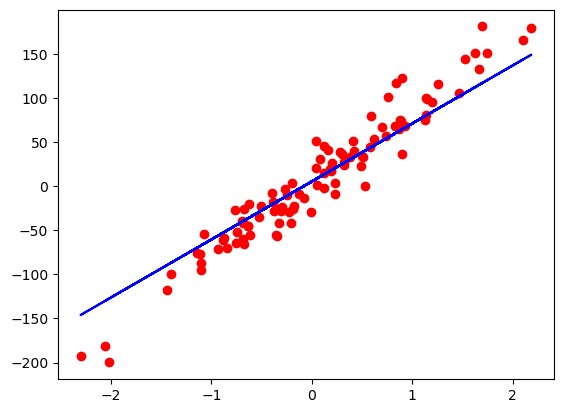

In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20,random_state=1)
# print(X_numpy)
# print(y_numpy)

X = torch.from_numpy(X_numpy.astype(np.float32))            # double -> error would occur
# print(X)
y = torch.from_numpy(y_numpy.astype(np.float32))
# print(y)
y = y.view(y.shape[0],1)
# print(y)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass: compute prediction and loss
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    
    # backward pass 
    loss.backward()
    
    # update
    # with torch.no_grad():
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1 )% 10 == 0:
        print(f'Epoch: {epoch + 1}, Loss: {loss.item():.4f}')
        
# plot
predicted = model(X).detach().numpy()               # detach() 分离一个require_grad = False 的新张量
plt.plot(X_numpy, y_numpy, 'ro') 
plt.plot(X_numpy, predicted, 'b')
plt.show()
